# Coding Project 1 : Linear Regression and Regularization

**Please write the names of all group members here:**




---


*Note:* The provided structure for the code below is only suggestive, and if you want to structure your programs differently you may do so.

### Question 1 - Importing the Data

In [26]:
#For Question 1, you can import the following packages:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.model_selection  import train_test_split

In [53]:
#1.a) Import the dataset Housing.csv into Python as a pandas DataFrame.
#To determine whether a variable is categorical or numerical, please refer to the file data_description.txt.
#Remember that the first column of the csv file is an index column and should not be considered as an explanatory variable.
df = pd.read_csv("Housing.csv")
print(df.head())

y = df["SalePrice"]
X = df.drop(columns=["Id", "SalePrice"])
#we stop dealing with df here now just work with X and y
print("X dims: ", X.shape)
print(X.head())
print("y length: ", y.size)
print(y.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

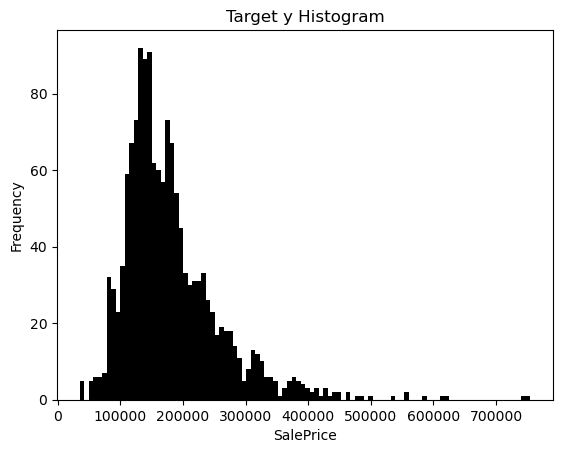

In [54]:
#1.b) Graphically determine whether the target variable SalePrice is approximately Gaussian.
n_bins = 100
plt.hist(y, bins=n_bins, color='black')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Target y Histogram')
plt.show()

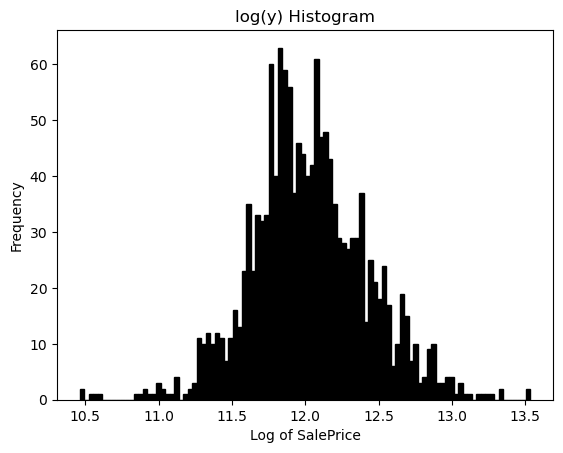

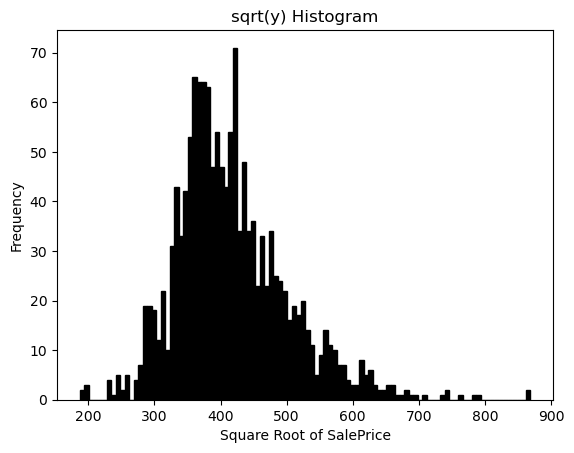

In [55]:
#If not, suggest a suitable transformation to bring SalePrice closer to a Gaussian distribution (logarithmic, inverse, square-root, ...).
#log transformation makes it more or less normal distributed
plt.hist(np.log(y), bins=n_bins, color='black', edgecolor='black')
plt.xlabel('Log of SalePrice')
plt.ylabel('Frequency')
plt.title('log(y) Histogram')
plt.show()

plt.hist(np.sqrt(y), bins=n_bins, color='black', edgecolor='black')
plt.xlabel('Square Root of SalePrice')
plt.ylabel('Frequency')
plt.title('sqrt(y) Histogram')
plt.show()


In [56]:
#Do not forget to apply this transformation to the target variable SalePrice in the dataset.
print(y.head())
y = np.log(y)
print(y.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64
0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


Why is it important to consider such potential transformations?

- Sometimes the target variable may be skewed
- Many models assume the errors (residuals) are normally distributed with constant variance
- Maybe reduce the influence of outliers

Linear Regression assumes that the noise/error follows a normal distribution with mean 0.

In [57]:
#1.c) Split the data into a training set (X,y)_train and a test set (X,y)_test.
#Randomly assign 70% of the observations to the training set and the remaining 30% to the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X dims:", X.shape)
print("X_train dims:", X_train.shape)
print("X_test dims:", X_test.shape)
print("y len:", y.size)
print("y_train len:", y_train.size)
print("y_test len:", y_test.size)

X dims: (1460, 79)
X_train dims: (1022, 79)
X_test dims: (438, 79)
y len: 1460
y_train len: 1022
y_test len: 438


In [67]:
#1.d) Replace missing values in X using the training data statistics only -> use .fillna(...)
#For numerical features, replace missing values with the mean of the column .
#For categorical features, replace missing values with the most frequent category.
#You can use the function df.select_dtypes(...) to idetify categorical variables as the variables with type 'object' and 'category'. 
#Some categorical variables admit NA (or None) as a valid category, which should be treated as an actual level and not as missing.

#from dataypes.csv we see we have only 'object' or 'int64' or 'float64'
X_train.dtypes.to_csv('dataypes.csv')
print("Total number of features:", len(X_train.columns))
#expecting 79

#Categorical features
X_train_categorical = X_train.select_dtypes('object', 'category')
X_train_categorical.insert(0, 'MSSubClass', X_train["MSSubClass"], allow_duplicates=False)
print("Number of categorical features: ",len(X_train_categorical.columns))
#expecting 44
#objects.csv has all the categorical features i.e. those that are type 'object'
X_train_categorical.dtypes.to_csv('objects.csv')

X_train_numerical = X_train.drop(columns=X_train_categorical)
print("Number of numerical features: ", len(X_train_numerical.columns))
#expecting 35
#numericals.csv has all the numerical features i.e. those that are not type 'object'
X_train_numerical.dtypes.to_csv('numericals.csv')


num = X_train_numerical.columns
cat = X_train_categorical.columns

X_train_numerical.to_csv("x_train_numerical_before_impute")
X_train[num] = X_train[num].fillna(np.mean(X_train[num]))
X_train[num].to_csv("x_train_numerical_after_impute")

X_test[num].to_csv("x_test_numerical_before_impute")
X_test[num] = X_test[num].fillna(np.mean(X_train[num]))
X_test[num].to_csv("x_test_numerical_after_impute")


Total number of features: 79
Number of categorical features:  44
Number of numerical features:  35


In [ ]:
























#1.d) Replace missing values in X using the training data statistics only -> use .fillna(...)
#For numerical features, replace missing values with the mean of the column .
#For categorical features, replace missing values with the most frequent category.
#You can use the function df.select_dtypes(...) to idetify categorical variables as the variables with type 'object' and 'category'. 
#Some categorical variables admit NA (or None) as a valid category, which should be treated as an actual level and not as missing.
def fill_with_mode(col):
    modeval = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(modeval)
    X_test[col] = X_test[col].fillna(modeval)

def fill_with_mean(col):
    meanval = X_train[col].mean()
    X_train[col] = X_train[col].fillna(meanval)
    X_test[col] = X_test[col].fillna(meanval)

def normalize(col):
    training_mean = X_train[col].mean()
    training_std = X_train[col].std()
    X_train[col] = (X_train[col] - training_mean) / training_std
    X_test[col] = (X_test[col] - training_mean) / training_std


def one_hot(col):
    train_dummies = pd.get_dummies(X_train[col], prefix=col)
    test_dummies  = pd.get_dummies(X_test[col], prefix=col)

    test_dummies = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)

    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)
    X_train[train_dummies.columns] = train_dummies
    X_test[test_dummies.columns]   = test_dummies

categorical = list(df.select_dtypes(include=['object', 'category']).columns)

# print(categorical)
# fill_with_mode(df.select_dtypes('object'))

for col in list(X_train.columns):
    if col in categorical:
        fill_with_mode(col)
        one_hot(col)
        continue
    fill_with_mean(col)
    normalize(col)


### Question 2 - Linear Regression on Numerical Features

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

#2.a) Fit a linear regression model on the training dataset with numerical features only using the sklearn package.
#Output a table with the name of each feature and the associated regression coefficient.

#Compare the in-sample and out-of-sample Mean Squared Error (MSE) and R^2.


#2.b) (i) Compute the estimated coefficients for each explanatory variable using the numpy package. 
#Remember that the design matrix A needs to include a column of 1's. Use np.linalg.solve(...).

# (ii) Compute the standard error of each estimated coefficient using the numpy package.

# (iii) Compute the (in-sample) MSE and R^2 using the numpy package.

# (iv) Do the results change using pseudoinversion instead of standard matrix inversion? Use np.linalg.pinv(...).

# (v) Compare your results (with and without pseudoinversion) to the output of the sm.OLS(...) function.



### Question 3 - Regularization Techniques

In [3]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score, RepeatedKFold, KFold

# 3.a) Linear regression with the full Housing dataset (numerical + categorical).
#How do the in-sample and out-of-sample metrics change when including categorical features, and what does this reveal about the model’s ability to generalize?


#3.b) Implement the Truncated Pseudoinverse, Ridge, Lasso, and Elastic Net regularization techniques.
#Use 8-fold cross-validation to tune the hyperparameters of each regularization technique based on the MSE metric.
#Why is it important that the intercept is not penalized in these models?

#Compare their performance in terms of in-sample and out-of-sample MSE and R2 with the linear regressions of Questions 2.a) and 3.a).


#3.c) During cross-validation, what are possible sources of information leakage? 
#Briefly describe what leakage means in this context, and explain what steps you would take to avoid it if you were building a more complete data preprocessing pipeline (e.g., with imputation, scaling, or encoding). 
#You do not need to implement these steps here, only to explain the idea.


#3.d) For the  Lasso and Elastic Net regressions, how many coefficients are non-zero?

#Compare this number with the number of coefficients retained by the Ridge and Truncated Pseudoinverse models and provide an explanation.


#3.e) #Based on your findings from Questions 2 and 3, which model would you recommend for predicting house prices? 
#Justify your choice not only by comparing performance metrics, but also by discussing the nature of the problem (e.g., number of features, presence of categorical variables, potential collinearity, sparsity, nonlinearity). 
#Explain how the strengths and limitations of the chosen method align with this problem structure.

